# Graph 시각화


## 코랩에 한글 폰트 설치
- (주의!) 아래 셀을 실행 후에, 런타임 - 런타임 다시 시작을 수행해야 한다
 - 코랩은 리눅스 머신이면 한글이 미리 설치되어 있지 않다
 - 한글이 이미 설치된 PC에서는 아래 셀을 실행할 필요없다

In [4]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 런타임 - 런타임 다시시작 수행

## 한글 사용 설정
- 그림에 한글이 보이게 하기 위해서 한글 사용을 설정한다.
- 운영체제마다 명령이 다르다

In [5]:
import platform, matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 불러오기
# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumBarunGothic' 

## import


In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# 그래프 그리기
- 숫자 배열을 그래프로 그리는 방법
- 데이터프레임을 그래프로 그리는 방법

## 배열을 그래프로 그리기

- 기본적으로 plot, scatter, hist, boxplot, bar 를 사용한다

### 선 연결 그래프,  plot()
- 주어진 값을 연결한다
- 시간에 따른 변화를 나타내거나, x의 변화에 따른 y의 값을 표현

### (x, y) 좌표를 주는 경우

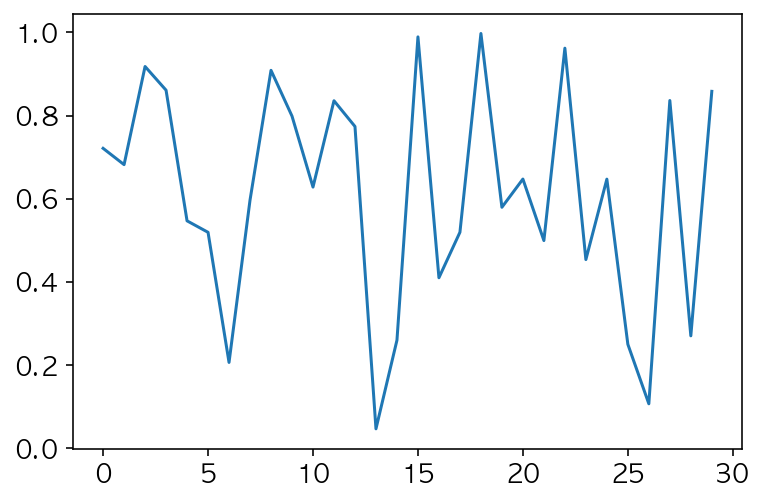

In [7]:
## 0~1사이의 랜덤 숫자 30개를 선으로 연결하기 (plot)

import numpy as np
import matplotlib.pyplot as plt

N = 30
x = range(N)
y = np.random.rand(N)
plt.plot(x, y)

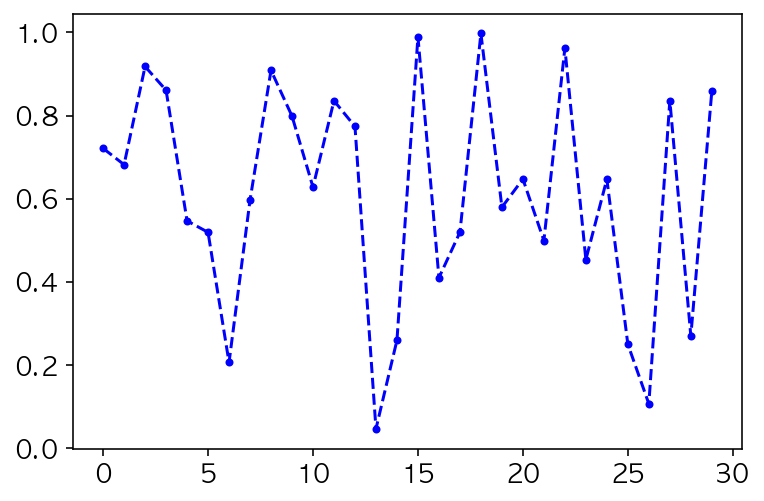

In [8]:
## 검정색, 점선, 마커 표시하기

plt.plot(y,'--.b')

### 히스토그램, hist()
- 확률 분포를 나타내는데 사용

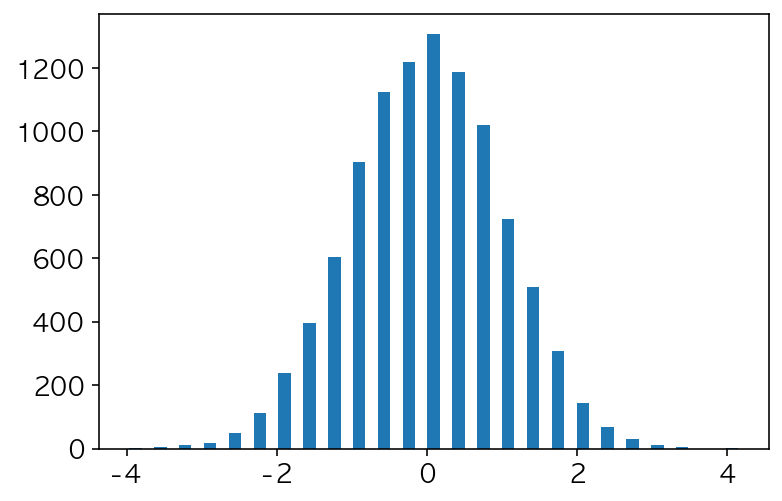

In [9]:
## 정규분포(0,1)를 갖는 랜덤 숫자의 확률분포 보기

N = 10000
x = np.random.randn(N)
plt.hist(x, bins=25, rwidth=0.5)
plt.show()

## scatter()
- 스캐터플롯 (산포도)
- 데이터 분석에서 가장 유용하게 사용된다

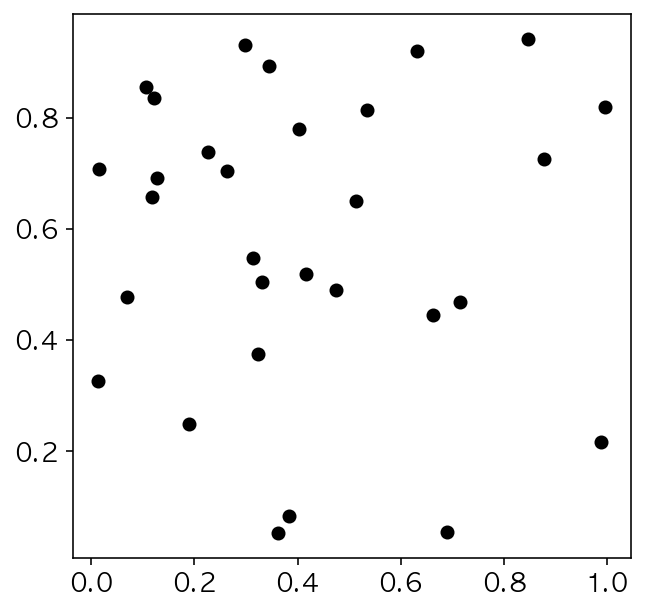

In [10]:
## 0~1사이의 랜덤 숫자 30개를 두 세트 만들어 산포도 그리기

N = 30
x = np.random.rand(N)
y = np.random.rand(N)
plt.figure(figsize=(5,5))
plt.scatter(x,y,c='k')
plt.show()

## boxplot()
- 박스 플롯
- 평균값, 25%, 75%, 이상치 등 수치형 데이터의 범위을 한번에 표시한다

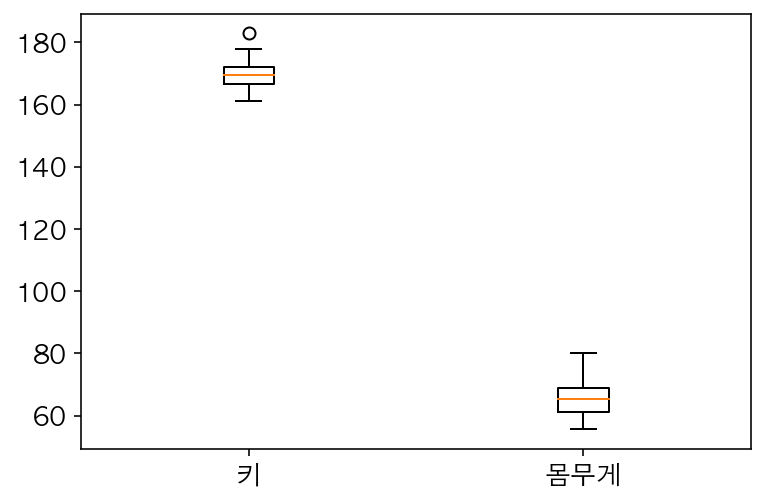

In [11]:
## 키(170,4)와 몸무게(65,5)를 박스플롯으로 그리기

N=200
x = np.random.randn(N)*4 + 170
y = np.random.randn(N)*5 + 65
plt.boxplot([x,y], labels=['키', '몸무게'])
plt.show()

### 막대 그래프, bar()
- 수치의 상대적인 값을 높이로 표시
- 수평으로 그리려면 barh() 사용

<BarContainer object of 10 artists>

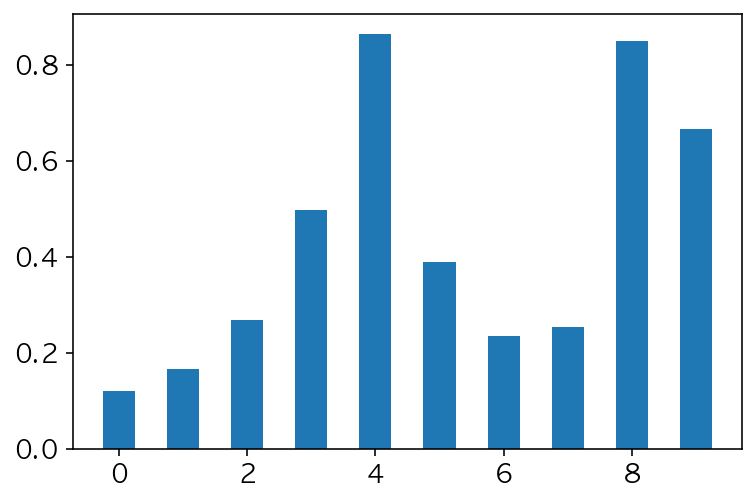

In [12]:
## 수직 막대 그래프(bar) 그리기

N = 10
x = range(N)
y = np.random.rand(N)
plt.bar(x, y, width=0.5)

<BarContainer object of 10 artists>

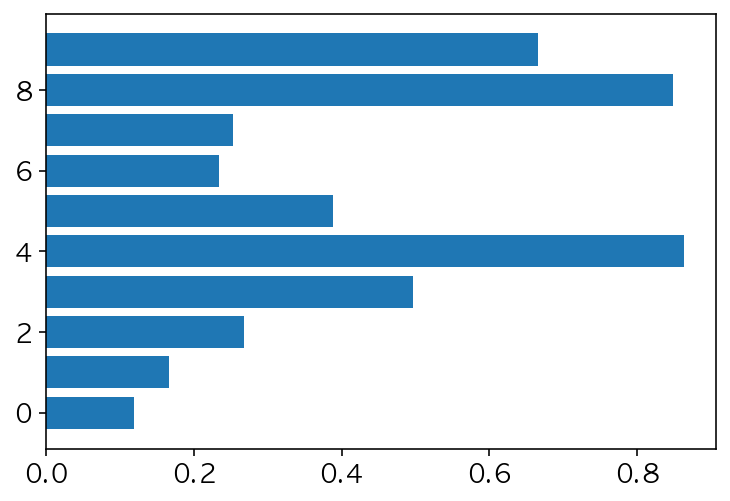

In [13]:
## 수평 막대 그래프(horizontal bar) 그리기

plt.barh(x, y)

## 데이터프레임을 그래프로 그리기
- 데이터프레임에서 바로 그래프를 그릴 수 있다

In [33]:
## 인구, 인구증가분 데이터프레임 만들기

x = {'city': ['서울', '부산', '대구', '대전', '광주','인천', '울산'],
        '인구': [990, 350, 250, 154, 150, 290, 120],
        '20년증가': [188, 53, 40, 38, 23, 62, 21]}

df = pd.DataFrame(x)
df

,city,인구,20년증가
0,서울,990,188
1,부산,350,53
2,대구,250,40
3,대전,154,38
4,광주,150,23
5,인천,290,62
6,울산,120,21


In [43]:
df = df.set_index('city')
df

,인구,20년증가
city,,
서울,990,188
부산,350,53
대구,250,40
대전,154,38
광주,150,23
인천,290,62
울산,120,21


### plot()

<AxesSubplot:xlabel='city'>

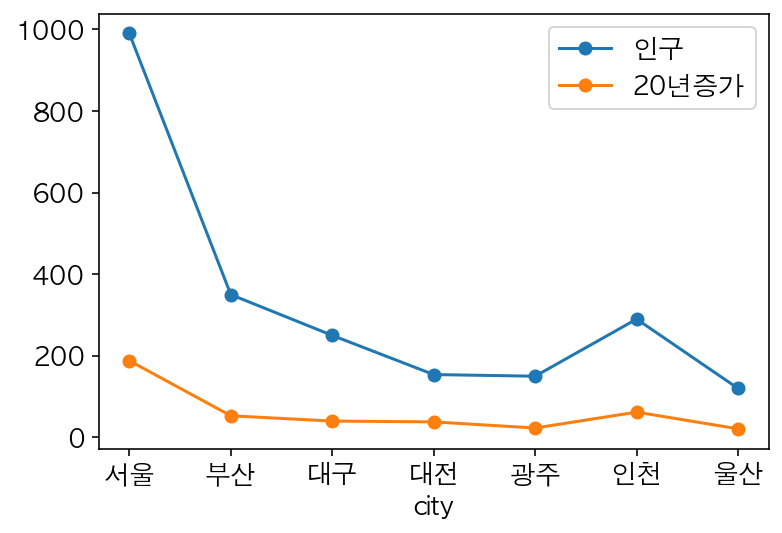

In [44]:
## 데이터프레임에 있는 모든 수치형 데이터를 그리기

df.plot(marker='o')

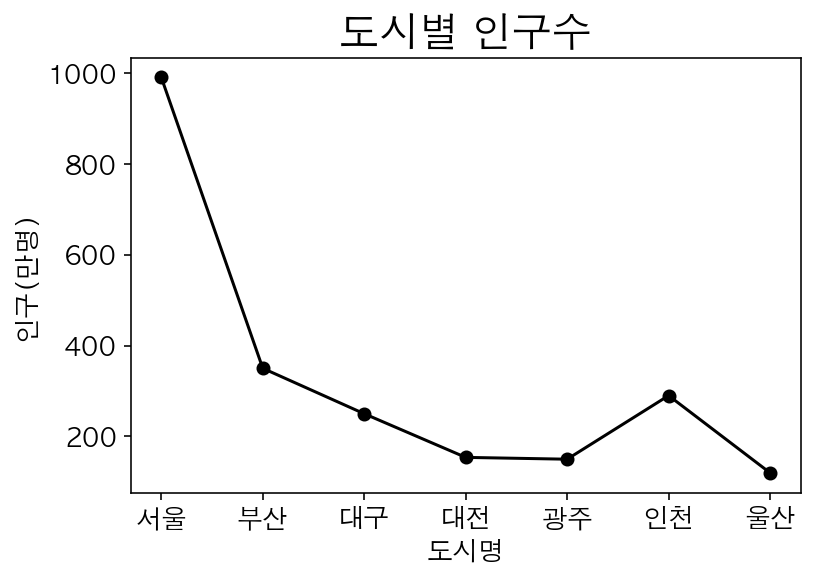

In [45]:
## 일부 컬럼만 그리기

plt.figure()
ax = df["인구"].plot(c='k',marker='o')
plt.title('도시별 인구수', fontsize=20)
plt.xlabel('도시명')
plt.ylabel('인구(만명)')
plt.show()

### boxplot()

Text(0, 0.5, '인구(만명)')

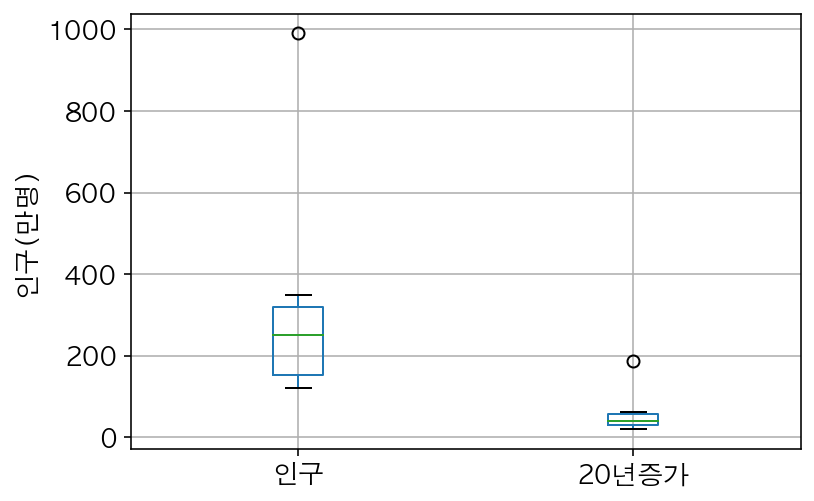

In [19]:
## 데이터프레임에 있는 모든 수치형 데이터를 박스플롯으로 그리기

df.boxplot()
plt.ylabel('인구(만명)')

## plot()에서 kind 를 사용하는 방법
-plot() kind 옵션
 - line, bar, hist, box, kde, area, oie, scatter, hexbin

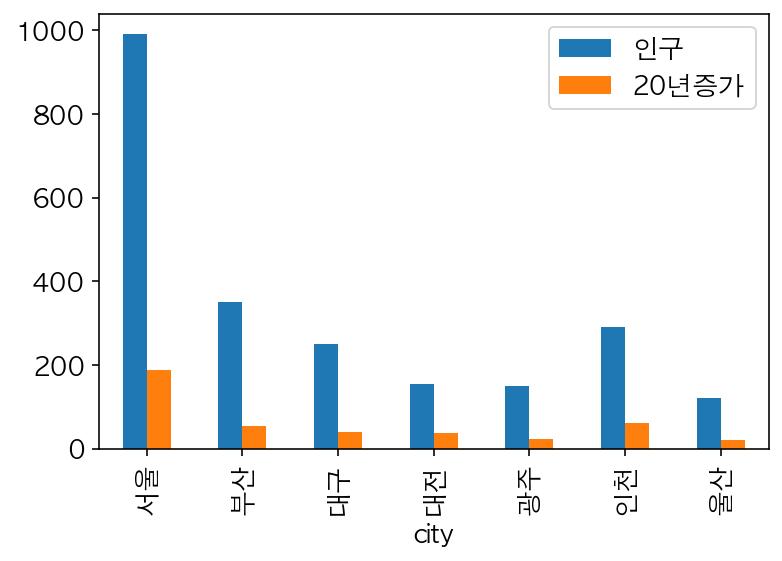

In [25]:
## plot()에서 kind 사용하기 (수직 막대그래프)

ax = df.plot(kind='bar')

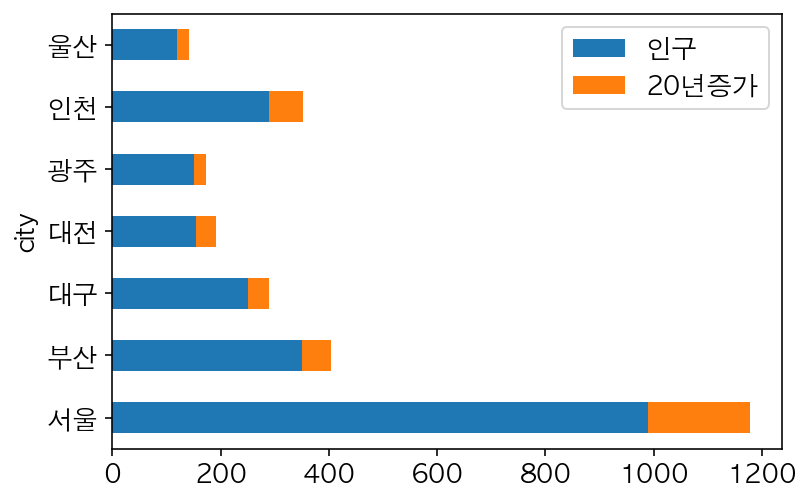

In [27]:
## plot()에서 kind 사용하기 (수평, 누적 막대그래프)

ax = df.plot(kind='barh', stacked=True)

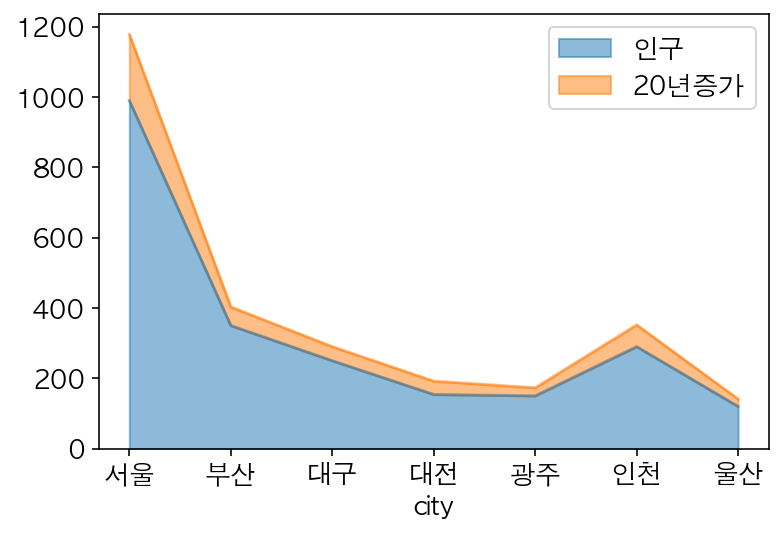

In [28]:
## plot()에서 kind 사용하기 (면적 그래프)

ax = df.plot(kind='area', stacked=True, alpha=0.5)

# 임의의 x-y 관계 함수 그리기
- 일정 범위 값을 등간격으로 나누는 함수 np.linspace()를 이용
- 공간상 점들을 연결한다

In [29]:
## 두 숫자 사이를 등간격으로 나눈 값 얻기

xs=np.linspace(0,10,21) 
print(xs)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


Text(0, 0.5, 'y')

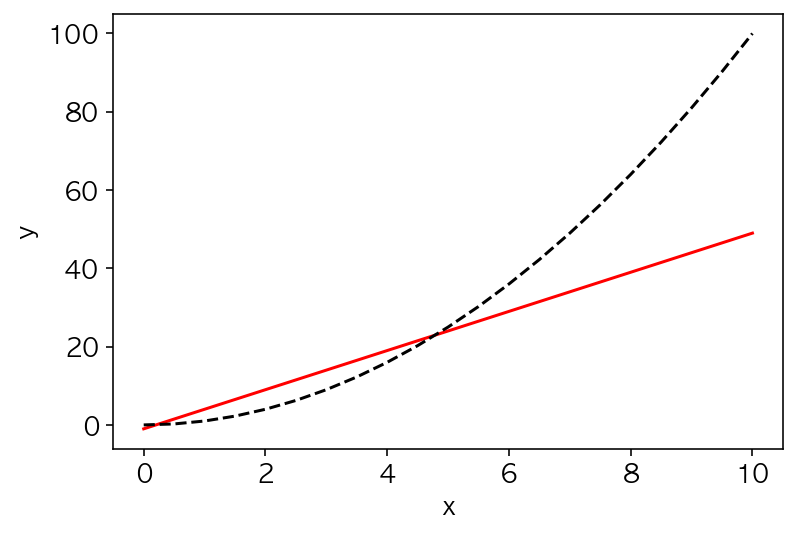

In [30]:
## 임의의 x-y 관계식을 그래프로 그리기

plt.plot(xs, 5*xs-1, c='r') # y = 5 * x - 1
plt.plot(xs, xs**2, 'k--')  # y = x^2
plt.xlabel('x')
plt.ylabel('y')